In [ ]:
!pip install networkx matplotlib dowhy pywhy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.4/383.4 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.0/193.0 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 66.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 88.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 102.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 91.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 102.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

/tmp/ipython-input-7-1052689520.py:46: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


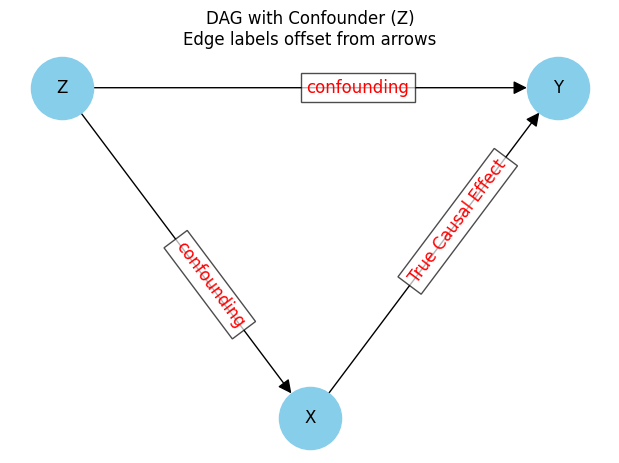

In [7]:
G = nx.DiGraph()
G.add_edges_from([
    ("X", "Y"),
    ("Z", "X"),
    ("Z", "Y")
])

# 2. Position the nodes
pos = {"Z": (0, 1), "X": (1, 0), "Y": (2, 1)}

# 3. Draw nodes and edges
plt.figure(figsize=(6, 4))
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="skyblue", arrowsize=20)

# 4. Define edge-labels including treatment effect
edge_labels = {
    ("Z", "X"): "confounding",
    ("Z", "Y"): "confounding",
    ("X", "Y"): "True Causal Effect"
}

# 5. Draw edge-labels with a adjusted label_pos
label_artists = nx.draw_networkx_edge_labels(
    G, pos, edge_labels=edge_labels,
    font_color="red", font_size=12,
    label_pos=0.6,  # shift labels slightly towards tail :contentReference[oaicite:1]{index=1}
    bbox=dict(facecolor='white', alpha=0.7),
    clip_on=False
)

# 6. Manually nudge the confounder labels off the arrows
offsets = {
    ("Z", "X"): (-0.05, -0.05),
    ("Z", "Y"): (-0.05, +0.05),
    ("X", "Y"): (0.0, +0.05)
}

for edge, text in label_artists.items():
    dx, dy = offsets.get(edge, (0, 0))
    x, y = text.get_position()
    text.set_position((x + dx, y + dy))

# 7. Finalize
plt.title("DAG with Confounder (Z)\nEdge labels offset from arrows")
plt.axis('off')
plt.tight_layout()
plt.show()